## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. member_hold_times_and_packs.tsv**
* memberID - Unique identifiers for each person
* holdtime - number of days the person had the pack
* puzzlepack - name of the pack (may have more than 1 puzzle per pack)

In [2]:
# loading first data about member hold times 
# dataset has 1.9 mb size on disk
member_holdtime_df = pd.read_csv('member_hold_times_and_packs.tsv', sep='\t', header=None)
member_holdtime_df.shape

(18141, 3)

In [3]:
member_holdtime_df.columns = ['memberID', 'holdtime', 'puzzlepack']
member_holdtime_df.head()

,memberID,holdtime,puzzlepack
0,member1,2.939411,Artifact Puzzles Justin Hillgrove Word Travels...
1,member1,0.998885,DaVici Puzzles Full Moon Feast DaVici Puzzles ...
2,member1,10.865032,DaVici Puzzles Flying Frigate DaVici Puzzles H...
3,member1,22.083971,Liberty Puzzles Haeckel Hummingbirds Nautilus ...
4,member1,5.077603,DaVici Puzzles Diana Zimens City Of Cats


**2. packs.tsv**
* memberID - Unique identifiers for each person
* holdtime - number of days the person had the pack
* puzzlepack - name of the pack (may have more than 1 puzzle per pack)

In [4]:
# loading second data about puzzle packs
# dataset has 98kb size on disk
packs_df = pd.read_csv('packs.tsv', sep='\t', header=None)
packs_df.shape

(909, 4)

In [5]:
packs_df.columns = ['pack_name', 'brand', 'piece_count', 'difficulty_rating']
packs_df.head()

,pack_name,brand,piece_count,difficulty_rating
0,Anne Belle Thompson The Mikado Anne Belle Thom...,Other-Hand-cut,"387,242","Average,Average"
1,Anthology Puzzles Alphonse Mucha La Plume Anth...,NaN,"320,160","Average,Average"
2,Anthology Puzzles Colorful Cat Anthology Puzzl...,NaN,"150,170","Average,Average"
3,Anthology Puzzles Framed American Gothic Antho...,NaN,"320,300","Average,Average"
4,Anthology Puzzles Over The Moon Anthology Puzz...,NaN,"278,177","Hard,A-Easy"


## Basic Data Cleaning

**1. member_hold_times_and_packs.tsv**
* memberID - Unique identifiers for each person
* holdtime - number of days the person had the pack
* puzzlepack - name of the pack (may have more than 1 puzzle per pack)

In [6]:
member_holdtime_df.isnull().sum()

memberID      0
holdtime      0
puzzlepack    0
dtype: int64

In [7]:
member_holdtime_df.nunique()

memberID        675
holdtime      17963
puzzlepack      910
dtype: int64

**Comments:**
- No missing values in the data
- We have information about 675 members and 910 unique puzzle packs

In [8]:
pd.options.display.max_colwidth = 200

In [9]:
num_puzzles = []
brand = []
for i in member_holdtime_df.index:
    puzzlepack = member_holdtime_df['puzzlepack'][i]
    puzzlepack_split = puzzlepack.split(' Puzzles ')
    num_puzzles.append(len(puzzlepack_split) - 1)
    brand.append(puzzlepack_split[0])

In [10]:
member_holdtime_df['num_puzzles'] = num_puzzles
member_holdtime_df['brand'] = brand

In [11]:
member_holdtime_df.head()

,memberID,holdtime,puzzlepack,num_puzzles,brand
0,member1,2.939411,Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West,2,Artifact
1,member1,0.998885,DaVici Puzzles Full Moon Feast DaVici Puzzles World&#39;s Greatest Miracle,2,DaVici
2,member1,10.865032,DaVici Puzzles Flying Frigate DaVici Puzzles Hobby Horse,2,DaVici
3,member1,22.083971,Liberty Puzzles Haeckel Hummingbirds Nautilus Puzzles Mother Adams,2,Liberty
4,member1,5.077603,DaVici Puzzles Diana Zimens City Of Cats,1,DaVici


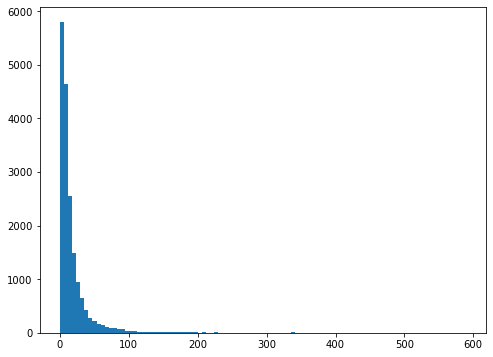

In [12]:
# what is the distribution of the hold times
plt.figure(figsize=(8,6))
plt.hist(member_holdtime_df['holdtime'], bins = 100)
plt.show()

In [13]:
# how many hold times are above a 150 days (5 months)
member_holdtime_df.loc[member_holdtime_df['holdtime'] >150].shape

(206, 5)

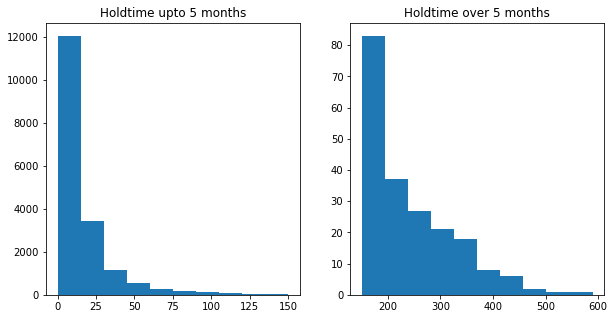

In [14]:
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
plt.hist(member_holdtime_df.loc[member_holdtime_df['holdtime'] < 150]['holdtime'], bins = 10)
plt.title("Holdtime upto 5 months")

plt.subplot(1,2,2)
plt.hist(member_holdtime_df.loc[member_holdtime_df['holdtime'] > 151]['holdtime'], bins = 10)
plt.title("Holdtime over 5 months")

plt.show()

**2. packs.tsv**
* pack_name - name of the pack (may have more than 1 puzzle per pack)
* brand - brand name of puzzle pack
* piece_count - number of pieces in puzzle
* difficulty_rating - difficulty rating for puzzle

**Comment:**
- Members data has 910 unique packs but the packs dataframe has info about 909 packs.

**Comments:**
- After combining all packs information, (splitting out a new row for packs with different brands, piece counts, and difficulty ratings) there are 1725 unique entries, 821 rows for brand are null, 259 rows for piece count are null, and 88 rows for difficulty rating are null
- there are 909 unique packs (same as before), 9 unique pack names, and 4 unique types of difficulty ratings available
- the mean piece count is about 359, with a standard deviation of 196, a min of 30, and a max of 1500
    - the histogram plot for piece count looks slightly skewed
- the most frequent brand that appears in the table is Artifact and the most frequent difficulty rating amongst the packs is average

In [15]:
packs_df['piece_count_1'] = packs_df['piece_count'].str.split(',', expand=True)[0]
packs_df['piece_count_2'] = packs_df['piece_count'].str.split(',', expand=True)[1]

In [16]:
packs_df['difficulty_rating_1'] = packs_df['difficulty_rating'].str.split(',', expand=True)[0]
packs_df['difficulty_rating_2'] = packs_df['difficulty_rating'].str.split(',', expand=True)[1]

In [17]:
packs_df.drop(['piece_count', 'difficulty_rating'], axis=1, inplace=True)

In [18]:
packs_df['brand_2'] = packs_df['brand'].str.split(',', expand=True)[1]
packs_df['brand'] = packs_df['brand'].str.split(',', expand=True)[0]

In [19]:
#consolidate packs_df table
packs_df1 = packs_df[['pack_name', 'brand', 'piece_count_1', 'difficulty_rating_1']]
packs_df1.columns = ['pack_name', 'brand', 'piece_count', 'difficulty_rating']
packs_df2 = packs_df[['pack_name', 'brand_2', 'piece_count_2', 'difficulty_rating_2']]
packs_df2.columns = ['pack_name', 'brand', 'piece_count', 'difficulty_rating']
packs_df = pd.concat([packs_df1, packs_df2], axis = 0).reset_index(drop=True)

In [20]:
# check for duplicate rows & then drop them
print(packs_df.duplicated().sum())
packs_df = packs_df.drop_duplicates()

93


In [21]:
#convert piece count column to integer type
packs_df['piece_count'] = pd.to_numeric(packs_df['piece_count'], errors='coerce').astype('Int64')

In [22]:
packs_df.head()

,pack_name,brand,piece_count,difficulty_rating
0,Anne Belle Thompson The Mikado Anne Belle Thompson Two Kimonos,Other-Hand-cut,387,Average
1,Anthology Puzzles Alphonse Mucha La Plume Anthology Puzzles Fun at the Fair,NaN,320,Average
2,Anthology Puzzles Colorful Cat Anthology Puzzles Life On The Reef,NaN,150,Average
3,Anthology Puzzles Framed American Gothic Anthology Puzzles Haeckel Floral,NaN,320,Average
4,Anthology Puzzles Over The Moon Anthology Puzzles Happy House Plants,NaN,278,Hard


In [23]:
packs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1817
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pack_name          1725 non-null   object
 1   brand              904 non-null    object
 2   piece_count        1466 non-null   Int64 
 3   difficulty_rating  1637 non-null   object
dtypes: Int64(1), object(3)
memory usage: 69.1+ KB


In [24]:
packs_df.isnull().sum()

pack_name              0
brand                821
piece_count          259
difficulty_rating     88
dtype: int64

In [25]:
packs_df.nunique()

pack_name            909
brand                  9
piece_count          461
difficulty_rating      4
dtype: int64

In [26]:
#get summary statistics for piece count column
packs_df.piece_count.describe()

count    1466.000000
mean      358.648704
std       195.990531
min        30.000000
25%       220.250000
50%       324.000000
75%       478.000000
max      1500.000000
Name: piece_count, dtype: float64

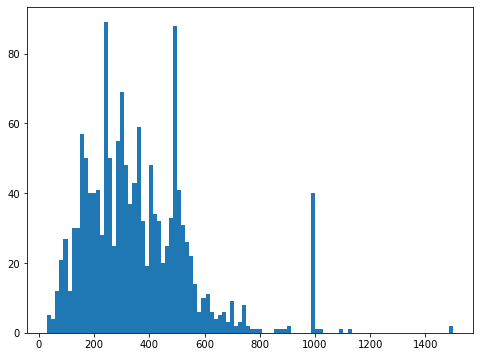

In [27]:
#plot distribution for piece count
plt.figure(figsize=(8,6))
plt.hist(packs_df[packs_df['piece_count'].notnull()]['piece_count'], bins = 100)
plt.show()

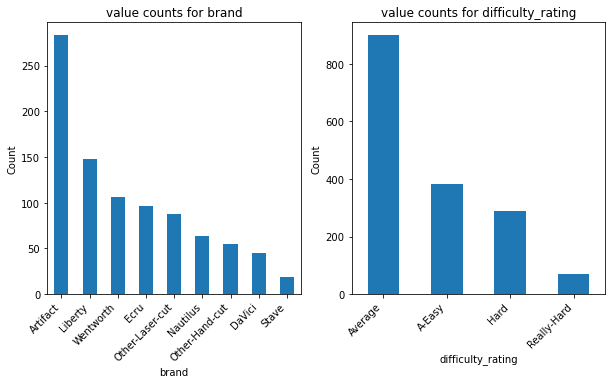

In [28]:
# bar charts for distribution of brand & difficulty rating
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
packs_df.brand.value_counts().plot(kind="bar")
plt.title("value counts for brand")
plt.xlabel("brand")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")

plt.subplot(1,2,2)
packs_df.difficulty_rating.value_counts().plot(kind="bar")
plt.title("value counts for difficulty_rating")
plt.xlabel("difficulty_rating")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")

plt.show()

# Problems -
1. Missing values in brand name. Can possibly come from members data. 
2. Missing in piececount1 - discuss on how to impute? (suggestion, average of pieces for the difficulty level?)
3. Missing in piececount2 - not all packs have 2 puzzles
4. how to deal with missing difficulty ratings?
5. brand_2 does not seem like an important variable and has almost 800 missing (900 total rows)

In [ ]:
packs_df.to_csv('packs_df.csv')